# Part II - Explanatory Slide Deck (Outcome)
## Communicating Data Findings on Prosper Loan Data Exploration and Visualization
## By Ayomide (Enoch) Fadeyi

## Investigation Overview

##  General Research Question guiding my analysis
### What are the main driving factors of outcome of loan?


> In part one of this project, the above question and a host of others have been answered during the exploratory data analysis stage. However, in this part two, I intend to carry out explanatory data analysis, explaining my findings using visuals and interpretation of these visuals. I will be adding a summary of key insights as contained in the README.md. This will helps my notebook to stay aligned to the key insights I want to include in my slide deck.

## Key Insights for Presentation

*** Those with low prosper rating are found to have highest rates of default in credits. 

  *** The business category tend to have larger amount. This implies that majority of the loans were gotten for business purposes.



## Dataset Overview

> ## Introduction

> Introducing my dataset
*** Loan Data from Prosper: This data set contains 113,937 observations (loans) with 81 features (variables/columns) on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 
Here is the link to the data dictionary to understand the dataset's variables: 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [33]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [34]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("C:/Users/USER/Desktop/prosperLoanData.csv")

In [35]:
target_features =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [36]:
target_df = df[target_features]

In [37]:
target_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20


In [38]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index() # Drop missing values in Prosper Rating

In [39]:
# Convert LoanOriginationDate to datetime datatype
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [40]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0) #fill in missing values Total Prosper Loan

In [41]:
# setting color
base_color = sns.color_palette()[0]

In [42]:
""" 
Here are the two functions that I will be using in plotting 
visuals in this section and subsequest ones.
"""

def hist_plotter(data, x, bins=1000):
    sns.histplot(data = data, x=x);
         
def count_plotter(xaxis, hue, data, color, palette, bins=1000):
    sns.countplot(x = xaxis, hue = hue, data = data, color=base_color, palette = palette);

### Observation 1

The majority of borrowers are employed.
It is worthy of note that full-time and self employed workers 
request for more loans than the rest.

### Visualization 1

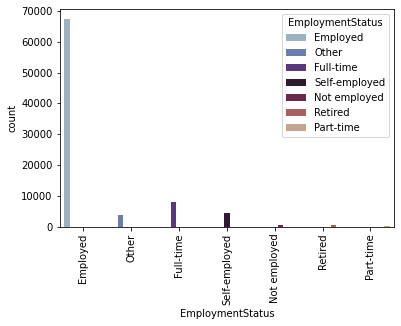

In [43]:
count_plotter('EmploymentStatus', 'EmploymentStatus', target_df, base_color, 'twilight')
plt.xticks(rotation = 90);

In [44]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

### Observation 2

With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

### Visualization 2

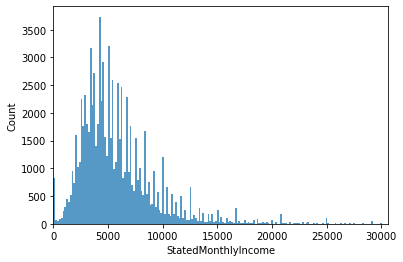

In [45]:
hist_plotter(target_df, 'StatedMonthlyIncome')
plt.xlim(0, boundary);

In [46]:
# Here, I'm just trying to restructure the Loan Status variable in the data
condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

### After transforming dataset, we have 19,664 completed loans and 6,341 defaulted.

In [47]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categories, axis=1)
listing_categories = target_df['ListingCategory (numeric)'].value_counts()

### Observation 3
As seen in the below visual, there is a significant difference between the completed Loan and defaulted Loan of employed and unemployed. The employed tend to complete their loans than the unemployed


### Visualization 3

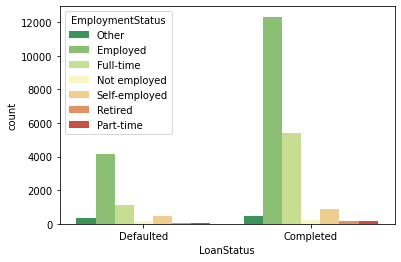

In [48]:
sns.countplot(x = 'LoanStatus', hue = 'EmploymentStatus', data = target_df, color=base_color, palette = 'RdYlGn_r');

### Observation 4

The debt consolidation category have the highest frequency among all of the categories, followed by other category.

### Visualization 4

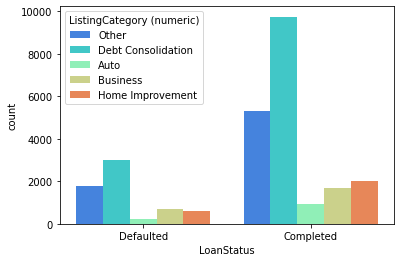

In [49]:
count_plotter('LoanStatus', 'ListingCategory (numeric)', target_df, base_color, palette = 'rainbow')

### Observation 5

The most frequent rating among defaulted and Completed loans is D.
While the second highest is A and so on.

### Visualization 5

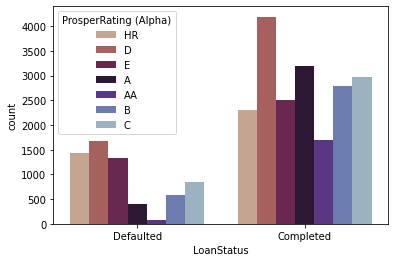

In [50]:
count_plotter('LoanStatus', 'ProsperRating (Alpha)', target_df, 'base_color', 'twilight_r')

### Observation 6

From the above graph, we can see completed credits are more than defaulted loans.
This clearly tells us that Prosper Loan Facility is doing fine.

### Visualization 6

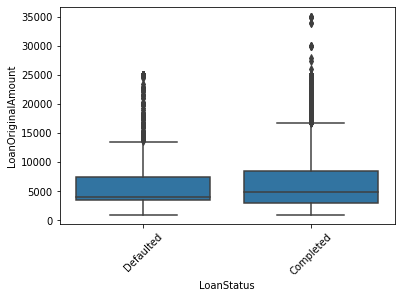

In [51]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 45);

### Observation 7

1. Except for the lowest ratings defaulted credits tend to be larger than completed.
2. Most of the defaulted credits comes from individuals with low Prosper rating.

### Visualization 7

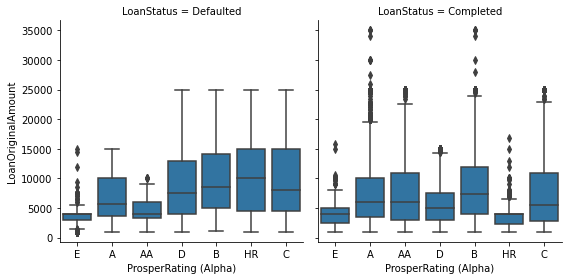

In [52]:
facet_boxplot = sns.FacetGrid(data = target_df, col = 'LoanStatus', size = 4)
facet_boxplot.map(sns.boxplot, 'ProsperRating (Alpha)', 'LoanOriginalAmount')

### Observation 8

1. Business listing category have larger amount of completed loans.
2. Home improvement have larger amount of defauled loans.

### Visualization 8

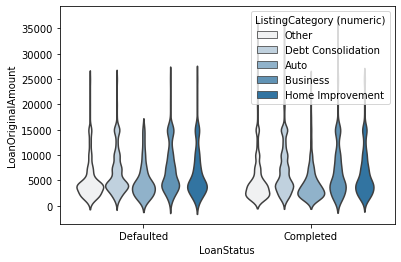

In [53]:
sns.violinplot(data=target_df, y='LoanOriginalAmount', x='LoanStatus', hue = 'ListingCategory (numeric)', color=base_color, inner=None, figsize = [20, 18]);

I got an interesting finding from the correlation plot above.
Loan Original Amount and Investors have a high positive correlation of 0.53.
This implies an increase in investors leads to an increase in the amount of Loan available.

<AxesSubplot:>

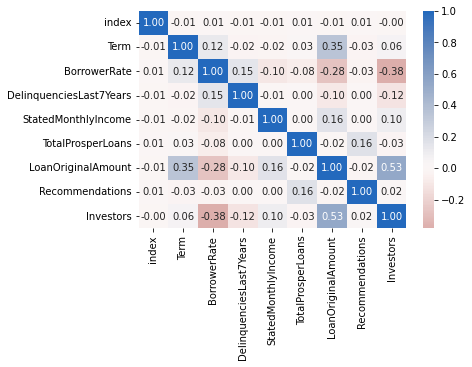

In [54]:
sns.heatmap(target_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

My initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

# Were there any interesting or surprising interactions between features?
Interesting finding was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits.

## Conclusions  
> ### Summary
My initial assumptions were strengthened. 

*** Most of the defaulted credits comes from individuals with low Prosper rating

*** The business category tend to have larger amount. This implies that majority of the loans were gotten for business purposes.

*** The employed tend to complete their loans than the unemployed


### What are the main driving factors of outcome of loan?
The main driving factors of outcome of loan from the analysis conducted in the project include the following:
1. Employment
2. Prosper Rating
3. Business Category

### Steps taken during my data exploration.
1. Question: The first step I took to conduct this project is to pose a general research question. From this one question, several other questions were asked and answered.
2. Analyse: Next, I used different libraries and functions to analyse the data in a bid to proffer answers to the questions posed.
3. Visualize: Then, I moved on to visualizing the data to aid comprehension and understanding of the findings from my analysis.
4. Observation: Lastly, I point out and explain my observations and findings to each of this question.

## Limitations
1. No Data Dictionary
2. Time constraints

## Further Research
I will like to carry out a further machine learning and predictive analytics based on the interesting relatioinships I discovered in this analysis. 

In [ ]:
!jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt